## Napětí v bodě

### Základní vztahy

Vztah mezi vektorem napětí $\boldsymbol{f}^{\rho}$, tenzorem napětí $\boldsymbol{T_{\sigma}}$ a směrovými kosiny  $\boldsymbol{n}$,

$$
 f_{i}^{\rho}=\tau_{ij}n_{j}.
$$

Zapsáno maticově

$$
 \boldsymbol{f}^{\rho}=\boldsymbol{T_{\sigma}}\boldsymbol{n},
$$

kde 

$$
 \boldsymbol{f}^{\rho}=\left[
 \begin{array}{c}
  f_{x}^{\rho}\\
  f_{y}^{\rho}\\
  f_{z}^{\rho}
 \end{array}
 \right],\quad\boldsymbol{T}_{\sigma}=\left[
 \begin{array}{ccc}
  \sigma_{x} & \tau_{xy} & \tau_{xz}\\
  \tau_{yx} & \sigma_{y} & \tau_{yz}\\
  \tau_{zx} & \tau_{zy} & \sigma_{z}
 \end{array}
 \right],\quad\boldsymbol{n}=\left[
 \begin{array}{c}
  \cos \alpha\\
  \cos \beta\\
  \cos \gamma
 \end{array}
 \right].
$$

O *hlavním napětí* hovoříme, jakmile se natočí plocha reprezentovaná směrovými kosiny $\boldsymbol{n}$ do takové polohy, že v matici tenzoru napětí $\boldsymbol{T}_{\sigma}$ vymizí nediagonální složky (smykové složky tenzoru napětí). Jde o základní vlastnost *symetrického tenzoru druhého řádu*, kterým je pravě *tenzor napětí*, *deformace*, příp. *kvadratických momentů plochy*. Zapsáno ve vzorcích musí platit
$$
 \tau_{ij}n_{j}=\sigma n_{i}\quad\mathrm{nebo}\quad\boldsymbol{T_{\sigma}}\boldsymbol{n}=\sigma\boldsymbol{n}
$$

nebo

$$
 \left[
 \begin{array}{ccc}
  \sigma_{x} & \tau_{xy} & \tau_{xz}\\
  \tau_{yx} & \sigma_{y} & \tau_{yz}\\
  \tau_{zx} & \tau_{zy} & \sigma_{z}
 \end{array}
 \right]\left[
 \begin{array}{c}
  \cos \alpha\\
  \cos \beta\\
  \cos \gamma
 \end{array}
 \right]=\sigma\left[
 \begin{array}{c}
  \cos \alpha\\
  \cos \beta\\
  \cos \gamma
 \end{array}
 \right].
$$ 
 
 

*Poznámka*: jde vlastně o určení *vlatních čísel* a *vlastních vektorů* matice $\boldsymbol{T}_{\sigma}$.

#### Př. 1

Napjatost v bodě $A$ je dána složkami tenzoru napětí $\sigma_{x}=30\text{ }\mathrm{MPa}$, $\sigma_{y}=10\,\mathrm{MPa}$, 
$\sigma_{z}=20\,\mathrm{MPa}$, $\tau_{xy}=10\,\mathrm{MPa}$, $\tau_{xz}=20\,\mathrm{MPa}$, $\tau_{yz}=0\,\mathrm{MPa}$. Určete *hlavní napětí*, *hlavní směry* a *typ napjatosti*.

#### Řešení

Nutné knihovny a spuštění parádního tisku

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
from sympy.abc import x,y,z
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
sp.init_printing()

V dalším bude třeba jen jeden symbol,

In [2]:
s=sp.symbols('sigma')

*Python*ovský zápis zadaných hodnot složek tenzotu napětí $\boldsymbol{T}_\sigma\left( A\right)$,

In [3]:
sx,sy,sz,txy,txz,tyz=30,10,20,10,20,0

K výpočtu invariantů napětí se hodí znalost následujících submatic matice $\boldsymbol{T}_\sigma\left( A\right)$,

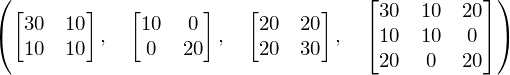

In [4]:
I21,I22,I23,I31=sp.Matrix([[sx,txy],[txy,sy]]), \
                sp.Matrix([[sy,tyz],[tyz,sz]]), \
                sp.Matrix([[sz,txz],[txz,sx]]), \
                sp.Matrix([[sx,txy,txz],[txy,sy,tyz],[txz,tyz,sz]])
I21,I22,I23,I31

Jednotlivé invarianty tenzoru $\boldsymbol{T}_\sigma\left( A\right)$ jsou,

\begin{eqnarray}
 I_1&=&\mathrm{tr}\left({\boldsymbol{T}_\sigma\left( A\right)}\right), \\
 I_2&=&\left|\begin{array}{cc}\sigma_x&\tau_{xy}\\\tau_{xy}&\sigma_y\end{array}\right|
       +\left|\begin{array}{cc}\sigma_y&\tau_{yz}\\\tau_{yz}&\sigma_z\end{array}\right|
       +\left|\begin{array}{cc}\sigma_z&\tau_{xz}\\\tau_{xz}&\sigma_x\end{array}\right|, \\
 I_3&=&\left|\begin{array}{ccc}\sigma_x&\tau_{xy}&\tau_{xz}\\
                               \tau_{xy}&\sigma_y&\tau_{yz}\\
                               \tau_{xz}&\tau_{yz}&\sigma_z\end{array}\right|.
\end{eqnarray}

Takže *Python*ovsky,

In [5]:
I1=I31.trace()
I2=I21.det()+I22.det()+I23.det()
I3=I31.det()
print 'Invarianty napeti:'
print 'I1={:9.2E}, I2={:9.2E}, I3={:9.2E}' \
      .format(float(I1),float(I2),float(I3))

Invarianty napeti:
I1= 6.00E+01, I2= 6.00E+02, I3= 0.00E+00


Charakteristická rovnice,

$$
 \sigma^3-I_1\sigma^2+I_2\sigma-I_3=0
$$

a její řešení,

In [6]:
cheqn=s**3-I1*s**2+I2*s-I3
cheqn

In [7]:
sol0=sp.solve(cheqn,s)
sp.pprint ('s1={:9.2E} MPa, s2={:9.2E} MPa, s3={:9.2E} MPa' \
      .format(float(sol0[0]),float(sol0[1]),float(sol0[2])))

s1= 0.00E+00 MPa, s2= 1.27E+01 MPa, s3= 4.73E+01 MPa


*Směry hlavních napětí* (*hlavní směry*),

$$
  \boldsymbol{n}_i=\left[\begin{array}{ccc}\cos\alpha_i&\cos\beta_i&\cos\gamma_i\end{array}\right]^T,
$$

kde $\alpha_i$, $\beta_I$ a $\gamma_i$ jsou úhly, jež svírá směr hlavního napětí $\sigma_i$ s osami $x$, $y$ a $z$, se stanoví z homogenní soustavy rovnic,

$$
 \left[\begin{array}{ccc}\sigma_x-\sigma_i&\tau_{xy}&\tau_{xz}\\\tau_{xy}&\sigma_y-\sigma_i&\tau_{yz}\\\tau_{xz}&\tau_{yz}&\sigma_z-\sigma_i\end{array}\right]
 \left[\begin{array}{c}\cos\alpha_i\\\cos\beta_i\\\cos\gamma_i\end{array}\right]
 =0.
$$

Determinant matice této soustavy je výše uvedená charakteristická rovnice.


Takže matice soustavy v naše případě má tvar,

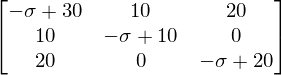

In [8]:
charmatrix=sp.Matrix(((sx-s,txy,txz),(txy,sy-s,tyz),(txz,tyz,sz-s)))
charmatrix

Rozložíme matici na horní a dolní trojúhelníkovou, tj. matici $L$ a $U$, 

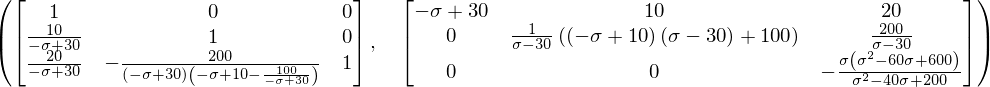

In [9]:
L,U,_=charmatrix.LUdecomposition()
L,sp.simplify(U)

V dalším je důležitá matice $U$. Zkontrolujeme, že *hlavní napětí* jsou opravdu *hlavní* (jinými slovy, že jsou to vlastní čísla matice tenzoru $\boldsymbol{T}_\sigma\left(A\right)$). Pozná se to nulovou hodnotou posledního prvku v matici $U$ pro všechny hodnoty $\sigma_1$, $\sigma_2$ a $\sigma_3$,

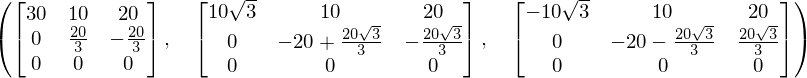

In [10]:
U1=U.subs(s,sol0[0])
U2=U.subs(s,sol0[1])
U3=U.subs(s,sol0[2])
sp.simplify(U1),sp.simplify(U2),sp.simplify(U3)

Z prvních dvou řádků matice $U$ se sestaví soustava rovnic,

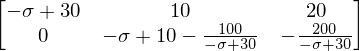

In [11]:
M=U[:2,:3]
M

jejíž řešení pro $\alpha_{ix}$ a $\alpha_{iy}$ platí,

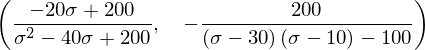

In [12]:
sol1=sp.solve_linear_system(M,x,y,z)
sol1[x],sol1[y]

Z předchozího řešení se může sestavit tzv. *vlastní vektor*,

$$
 \left[\begin{array}{ccc}\alpha_{ix}&\alpha_{iy}&-1\end{array}\right]^T
$$

odpovídající danému hlavnímu napětí $\sigma_i$,

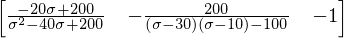

In [13]:
v=sp.Matrix(((sol1[x]),(sol1[y]),(-1)))
v.transpose()

a hlavní směr se dostane jeho normováním,

$$
 \boldsymbol{n}_i=\frac{1}{\sqrt{\alpha_{ix}^2+\alpha_{iy}^2+1}}\left[\begin{array}{ccc}\alpha_{ix}&\alpha_{iy}&-1\end{array}\right]^T,
$$

kde konkrétní velikost vlastního vektoru závisí na hodnotě $\sigma=\sigma_i$ následovně,

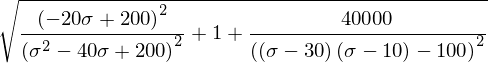

In [14]:
abs_v=sp.sqrt(v.dot(v))
abs_v

Jednotlivým hlavním napětím $\sigma_i$ odpovídají hlavní směry $\boldsymbol{n}_i$,

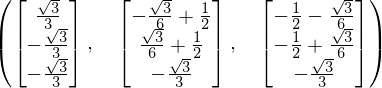

In [15]:
abs_v_=abs_v.subs(s,sol0[0]),abs_v.subs(s,sol0[1]),abs_v.subs(s,sol0[2])
a=abs_v_[0]**(-1)*v.subs(s,sol0[0]),abs_v_[0]**(-1)*v.subs(s,sol0[1]),abs_v_[0]**(-1)*v.subs(s,sol0[2])
sp.simplify(a)

Hlavní směry musí být navzájem ortogonální, tj. musí platit $\boldsymbol{n}_i\cdot\boldsymbol{n}_j=0$ pro $i\neq j$,

In [16]:
sp.simplify(a[0].dot(a[1])),sp.simplify(sp.expand(a[1].dot(a[2]))),sp.simplify(a[2].dot(a[0]))

#### Vykreslení *kvadriky napětí* v bodě

Protože je jedno z hlavních napětí nulové, přesněji $\sigma_1=0$, tvoří napětí v bodě $A$ rovinnou kvadriku. Protože jsou zbývající hlavní napětí navzájem různá a nenulová, tj. $\sigma_2\neq\sigma_3\neq 0$, jde o elipsu v rovině os $x_2$ a $x_3$ o rovnici,

$$
 \sigma_2 x_2^2+\sigma_3 x_3^2=1
$$

natočená do souřadnic s jednotkovými vektory $\boldsymbol{n}_2$ a $\boldsymbol{n}_3$. V prostoru je v podstatě o eliptický válec s podélnou osou podél $\boldsymbol{n}_1$.

Rovnice elipsy v hlavní rovině $x_2x_3$ s hlavními poloosami o velikosti $\sigma_2^{-\frac{1}{2}}$ a $\sigma_3^{-\frac{1}{2}}$,

\begin{eqnarray}
 x_2&=&\frac{1}{\sqrt{\sigma_2}}\cos\theta,\\
 x_3&=&\frac{1}{\sqrt{\sigma_3}}\sin\theta,\\
\end{eqnarray}

se může definovat pomocí *Python*u následovně,

In [17]:
def valec(u,v,coefs):
  ry,rz=1/np.sqrt(coefs)
  x=u
  y=ry*np.cos(v)
  z=rz*np.sin(v)
  return np.array([x,y,z])

V objektově orientovaném programování jdou funkce kdekoliv uvnitř kódu změnit, tzv. *dekorovat*. *Python* není výjimkou. Na jednu stranu to je zbytečná a ujetá věc (ostaně jako celé objektově orientované programování), ale na druhou stranu se u toho člověk pobaví a udělá danou část kódu jinak, než mu velí přirozenost. V našem případě se tato dekorace funkce dokonce hodí v řešení našeho problému vykreslení kvadriky napětí. Více o dekorátorech [zde](http://www.umt.fme.vutbr.cz/~tprofant/python-funkce.html).

Náš *dekorátor* natočí kvadriku napětí (hlavní souřadnicový systém) tak, jak se nachází v původním souřadnicovém systému, tj. provede transformaci

$$
\left[
  \begin{array}{c}
   x\\y\\z
  \end{array}
 \right]=
 \left[
  \begin{array}{ccc}
   \boldsymbol{n}_1&\boldsymbol{n}_2&\boldsymbol{n}_3
  \end{array}
 \right]\left[
  \begin{array}{c}
   x_1\\x_2\\x_3
  \end{array}
 \right]=\left[
  \begin{array}{ccc}
   \cos\alpha_1&\cos\alpha_2&\cos\alpha_3\\
   \cos\beta_1&\cos\beta_2&\cos\beta_3\\
   \cos\gamma_1&\cos\gamma_2&\cos\gamma_3\\
  \end{array}
 \right]\left[
  \begin{array}{c}
   x_1\\x_2\\x_3
  \end{array}\right].
$$

In [18]:
def natoceni(krivka,n):
  mC=np.array([[float(n[0][0]),float(n[1][0]),float(n[2][0])], \
               [float(n[0][1]),float(n[1][1]),float(n[2][1])], \
               [float(n[0][2]),float(n[1][2]),float(n[2][2])]])
  def inner(u,v,coefs):
    x0,y0,z0=krivka(u,v,coefs)
    i,j=x0.shape[0],x0.shape[1]
    x,y,z=np.zeros((i,j)),np.zeros((i,j)),np.zeros((i,j))
    for ii in range(i):
      for jj in range(j):
        a=np.array([x0[ii,jj],y0[ii,jj],z0[ii,jj]])
        b=np.dot(mC,a)
        x[ii,jj]=b[0]
        y[ii,jj]=b[1]
        z[ii,jj]=b[2]
    return x,y,z
  return inner

Vykreslení kvadriky napětí v hlavním souřadnicovém systému,

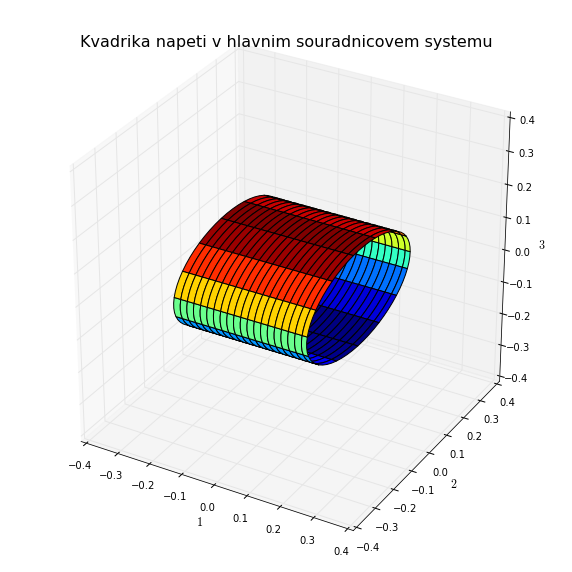

In [19]:
#parametry elipsy
coefs = (float(sol0[1]),float(sol0[2]))
#paramteizace elipsy
u=np.linspace(-0.2,0.2,80)
v=np.linspace(0,2*np.pi,60)
#vykresleni elipsy
[u1,v1]=np.meshgrid(u,v)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.4,0.4)
ax.set_zlim(-0.4,0.4)
ax.set_title('Kvadrika napeti v hlavnim souradnicovem systemu').set_fontsize(16)
ax.set_xlabel(r'$1$').set_fontsize(12)
ax.set_ylabel(r'$2$').set_fontsize(12)
ax.set_zlabel(r'$3$').set_fontsize(12)
x,y,z=valec(u1,v1,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)

Vykreslení kvadriky napětí v původním souřadnicovém systému,

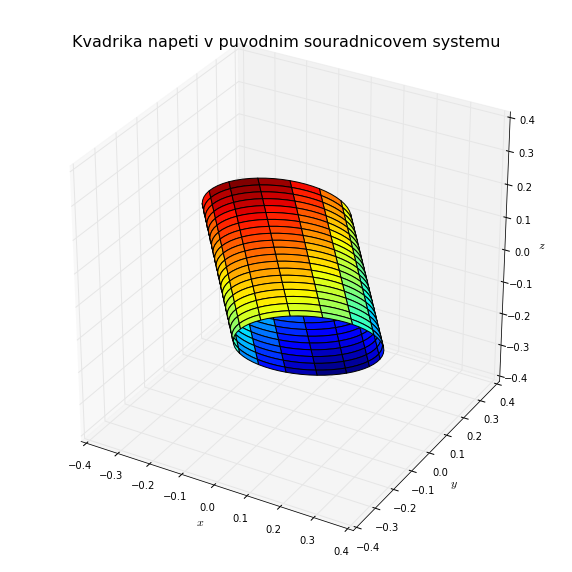

In [20]:
#v puvodnim souradnicovem system
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
valec=natoceni(valec,a)
ax.set_xlim(-0.4,0.4)
ax.set_ylim(-0.4,0.4)
ax.set_zlim(-0.4,0.4)
ax.set_title('Kvadrika napeti v puvodnim souradnicovem systemu').set_fontsize(16)
ax.set_xlabel(r'$x$').set_fontsize(12)
ax.set_ylabel(r'$y$').set_fontsize(12)
ax.set_zlabel(r'$z$').set_fontsize(12)
x,y,z=valec(u1,v1,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)